<a href="https://colab.research.google.com/github/dhesaardhi/dhesa-ardhi/blob/Random-Forest-with-Non-Time-Series/Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# IMPORT LIBABRY**

In [ ]:
                                                                                                                                     import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [ ]:
df= pd.read_csv("harga_mobil.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# DROP DATA

In [ ]:
df=df.drop([df.columns[0], df.columns[1]], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [ ]:
df=df.drop(columns=['CarName'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

# CORRELATION VARIABLE

<ipython-input-31-5e871163e950>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="Greys")


<Axes: >

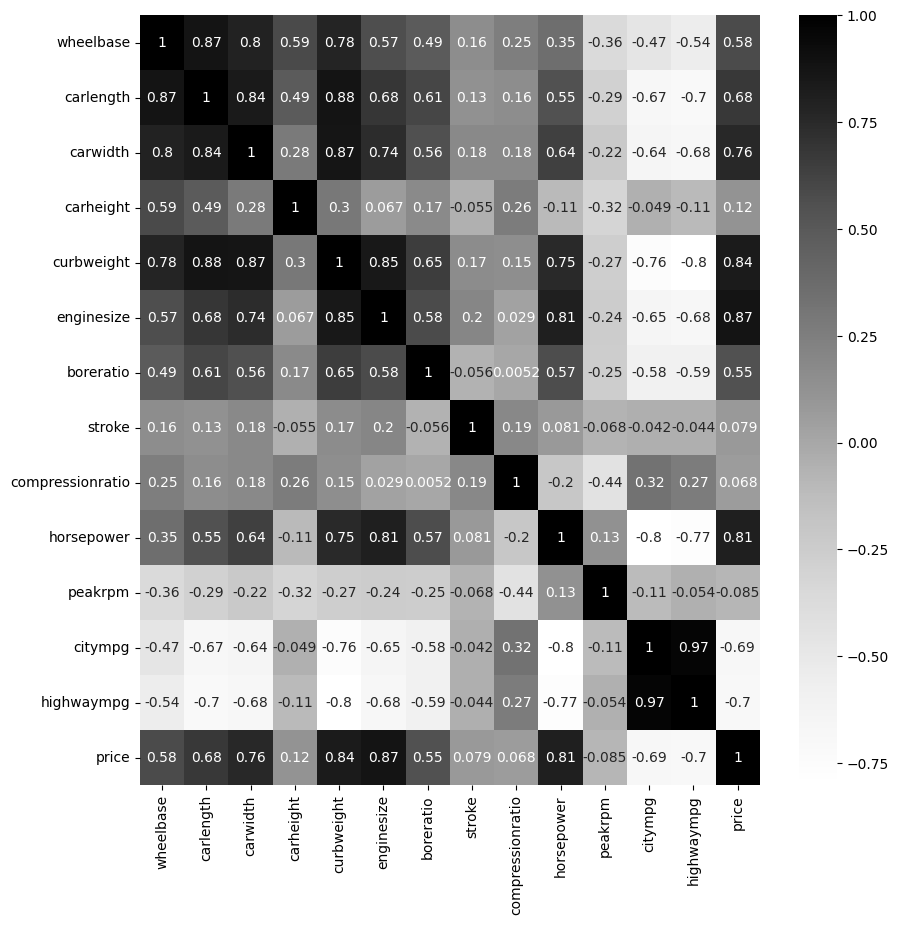

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Greys")

Korelasi variabel numerik diatas dapat dilihat bahwa variabel yang mempengaruhi harga ada beberapa seperti carwidth, curbweight, enginesize, horsepower dengan nilai lebih dari 75

<Axes: xlabel='fueltype', ylabel='price'>

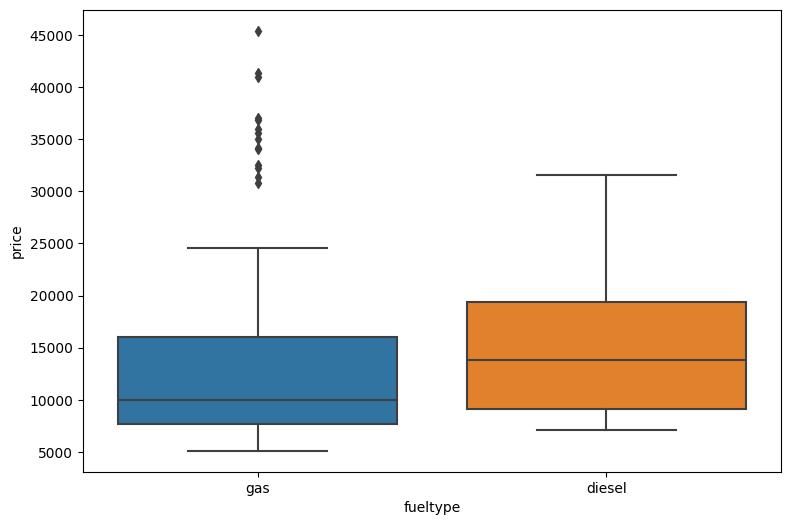

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="fueltype", y="price",data=df)

<Axes: xlabel='aspiration', ylabel='price'>

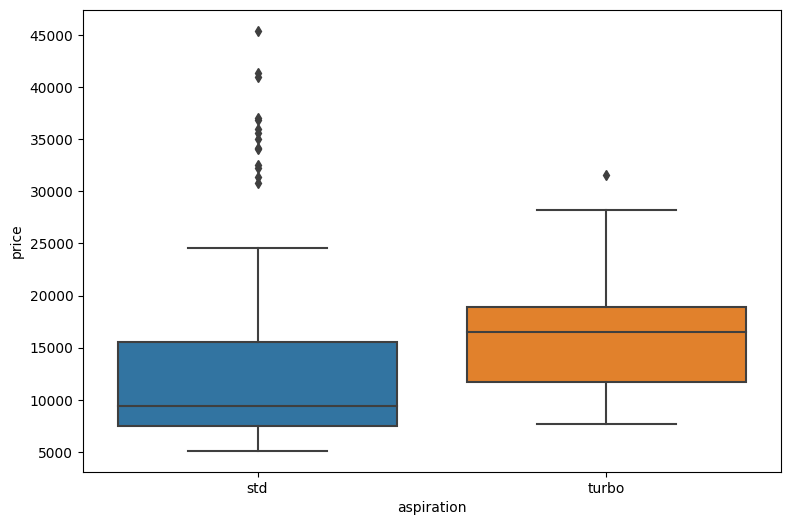

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="aspiration", y="price",data=df)

<Axes: xlabel='doornumber', ylabel='price'>

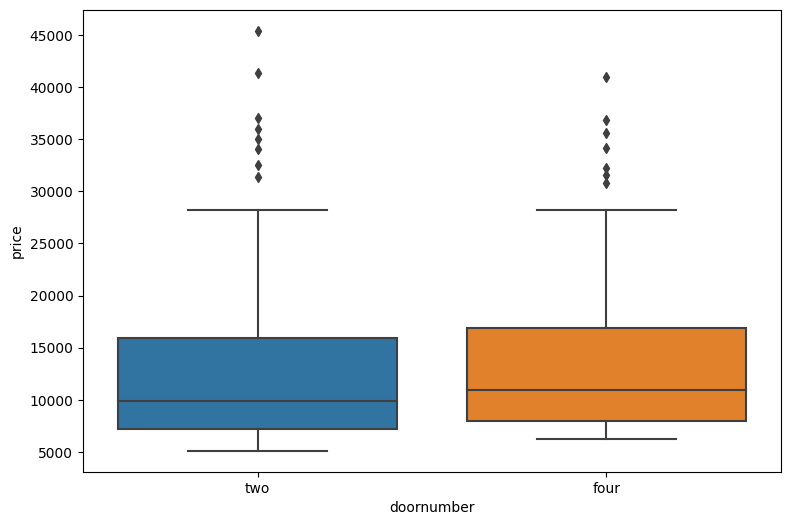

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="doornumber", y="price",data=df)

<Axes: xlabel='drivewheel', ylabel='price'>

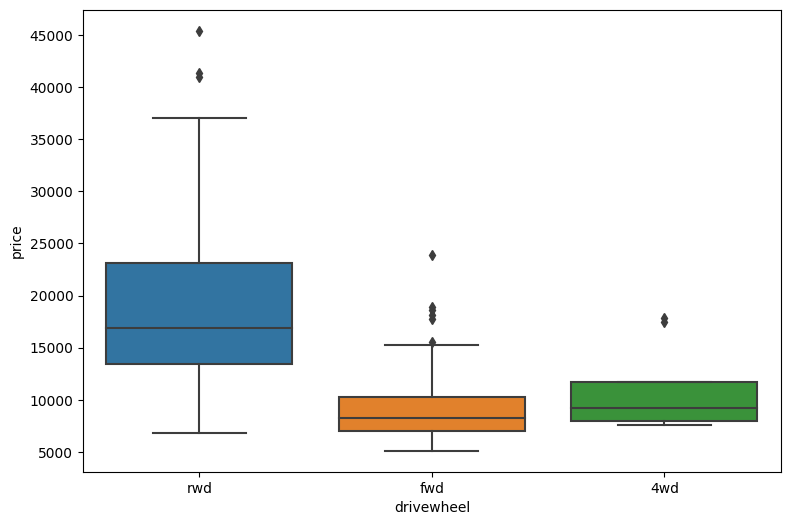

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="drivewheel", y="price",data=df)

<Axes: xlabel='fuelsystem', ylabel='price'>

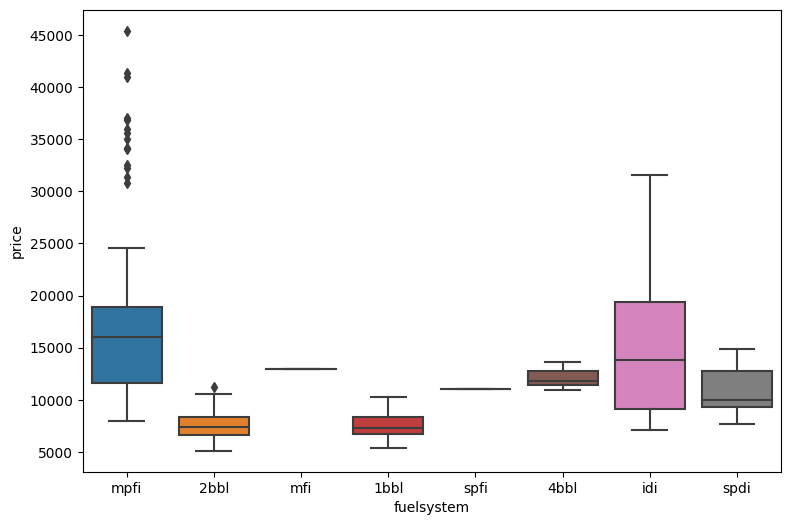

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="fuelsystem", y="price",data=df)

Dari visualisasi data kategori diatas dapat disimpulkan ada beberapa variabel yang mempengaruhi harga seperti fuelsystem, drivewheel, aspirration dan fueltype

# SPLIT TRAINING AND DATA TEST

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['price'])
y=df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((153, 22), (52, 22), (153,), (52,))

# DATA PRE-PROCESSING

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
numerical_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler())
])

In [ ]:
categorical_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder())
])

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor= ColumnTransformer([
    ("numeric",numerical_pipeline,['carwidth','curbweight','enginesize','horsepower']),
    ('categoric',categorical_pipeline,['fueltype','aspiration','drivewheel'])
])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipeline=Pipeline([
        ("prep",preprocessor),
        ("algo",RandomForestRegressor())
])

# MODELING

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'algo__max_depth':[4,5,6],
    'algo__max_features':[2,3],
    'algo__min_samples_leaf':[3,4,5],
    'algo__n_estimators':[100,200,300],
}
model=GridSearchCV(pipeline,param_grid=parameter,cv=3,n_jobs=1,verbose=1)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.score(X_train,y_train),model.best_score_,model.score(X_test,y_test))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'algo__max_depth': 5, 'algo__max_features': 3, 'algo__min_samples_leaf': 3, 'algo__n_estimators': 100}
0.9485925539841124 0.8855843675126943 0.8866287725877785


In [ ]:
df_test=pd.DataFrame(y_test).reset_index(drop=True)
df_test

df_test['prediction']=pd.DataFrame(model.predict(X_test))
df_test

,price,prediction
0,6795.0,6643.159537
1,15750.0,17348.190835
2,15250.0,12410.178812
3,5151.0,6636.453266
4,9995.0,9660.394322
5,11199.0,14757.148799
6,5389.0,6742.204539
7,7898.0,7931.812651
8,17199.0,18716.031432
9,6529.0,6849.821928


# EVALUATION

In [ ]:
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(df_test.price, df_test.prediction)
print("Mean absolute error : " + str(mae))

from sklearn.metrics import mean_squared_error
mse= mean_squared_error(df_test.price, df_test.prediction)
print("Mean squared error : " + str(mse))

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(df_test.price, df_test.prediction))
print("Root Mean squared error : " + str(rmse))

from sklearn.metrics import r2_score
r2=r2_score(df_test.price, df_test.prediction)
print("R Square : " + str(r2))

Mean absolute error : 2009.652239866677
Mean squared error : 8453868.6777169
Root Mean squared error : 2907.553727399874
R Square : 0.8866287725877785


# Kesimpulan

Kesimpulan :
Dari hasil modeling diatas bahwa dengan menggunakan metode KNN dengan menggunakan variabel carwidth, curbweight, enginesize, horsepower, fueltype, aspiration, drivewheel sangat mempengaruhi kondisi variabel price sebagai outputnya, dengan menggunakankan pre-processing pipeline dengan MinMaxScaler dan K-Fold atau iterasi 3. hal ini dapat dilihat dari besar nilai R Square mencapai 88%, dan rata-rata error 2067.379521640575.
